In [123]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

df=pd.read_csv("movies.csv")

In [124]:
df.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [125]:
for col in df.columns:
 pct_miss=np.mean(df[col].isnull())
 print(f"{col} - {pct_miss}%")

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [126]:
for cal in df.columns:
 df[col].dropna()

In [127]:
for col in df.columns:
 pct_miss=np.mean(df[col].isnull())
 print(f"{col} - {pct_miss}%")
 

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [128]:
df.shape

(7668, 15)

In [129]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [130]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [131]:
df["budget"]=df['budget'].fillna(0)
df['gross']=df["gross"].fillna(0)


In [132]:
df.dropna(how="any",subset=["released","score","votes","writer"],inplace=True)

In [133]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [134]:
df['budget']=df['budget'].astype("int64")
df["gross"]=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')


In [164]:
df["released"]=df["released"].replace(r"\s\([^)]*\)","",regex=True)
df['released']=pd.to_datetime(df['released'],format="%B %d, %Y",errors="coerce")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,2009-12-18,7.8,1100000,1155,1776,2330,55,237000000,2847246203,2249,162.0
7445,535,5,0,2019,2019-04-26,8.4,903000,162,741,2237,55,356000000,2797501328,1602,181.0
3045,6888,5,6,1997,1997-12-19,7.8,1100000,1155,1776,1592,55,200000000,2201647264,2249,194.0
6663,5140,5,0,2015,2015-12-18,7.8,876000,1125,2547,522,55,245000000,2069521700,1536,138.0
7244,536,5,0,2018,2018-04-27,8.4,897000,162,741,2237,55,321000000,2048359754,1602,149.0


In [136]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [137]:
pd.set_option('display.max_rows',15)

In [138]:
# df['company']=df['company'].drop_duplicates().sort_values(ascending=False)

In [139]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,The Day of the Beast,R,Action,1995,1998-12-23,7.4,19000,Álex de la Iglesia,Jorge Guerricaechevarría,Álex Angulo,Spain,0,0,Canal+ España,99.0
799,Echo Park,R,Comedy,1985,1986-07-25,5.8,610,Robert Dornhelm,Michael Ventura,Susan Dey,United States,0,0,Sascha-Verleih,88.0
7667,Tee em el,NaN,Horror,2020,2020-08-19,5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0
27,Raise the Titanic,PG,Action,1980,1980-08-01,5.0,4100,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000,0,ITC Films,115.0


In [140]:
df.isnull().sum()

name         0
rating      75
genre        0
year         0
released    56
score        0
votes        0
director     0
writer       0
star         1
country      1
budget       0
gross        0
company     13
runtime      2
dtype: int64

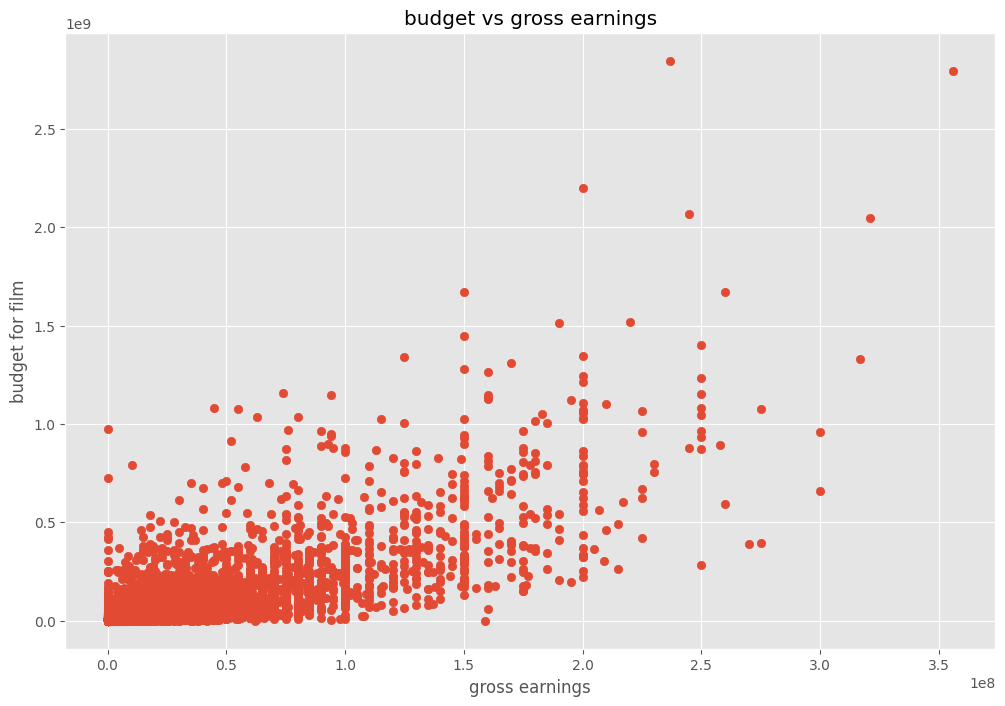

In [141]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title("budget vs gross earnings")
plt.xlabel("gross earnings")
plt.ylabel("budget for film")
plt.show()

In [142]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

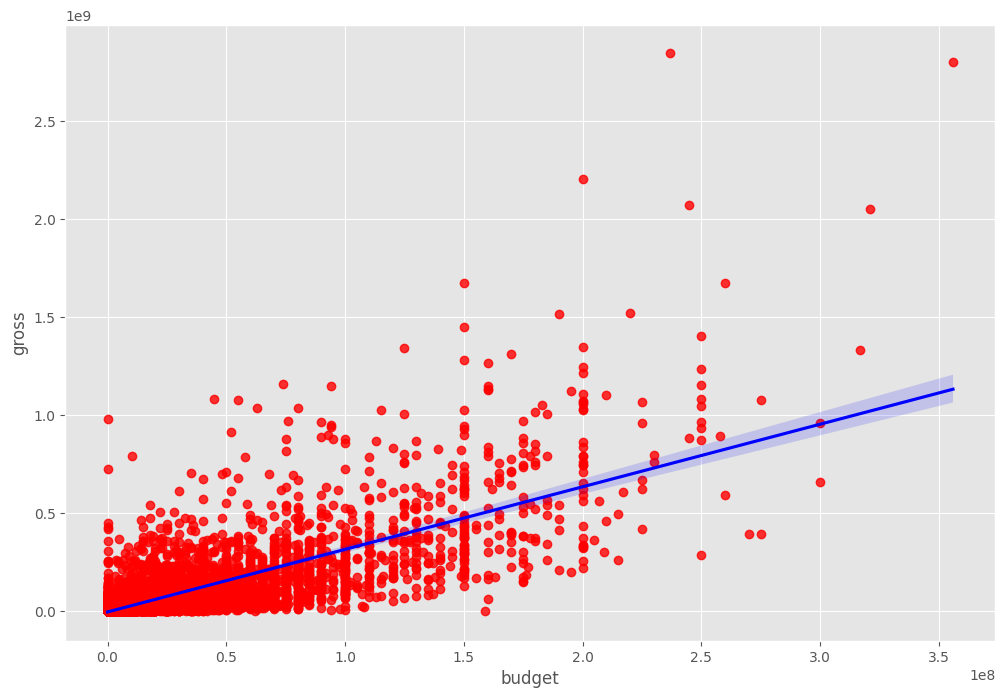

In [143]:
sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [144]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098085,0.223134,0.310337,0.262397,0.120666
score,0.098085,1.000000,0.409301,0.055629,0.186355,0.399458
votes,0.223134,0.409301,1.000000,0.486839,0.632962,0.309209
budget,0.310337,0.055629,0.486839,1.000000,0.750257,0.269606
gross,0.262397,0.186355,0.632962,0.750257,1.000000,0.245286
runtime,0.120666,0.399458,0.309209,0.269606,0.245286,1.000000


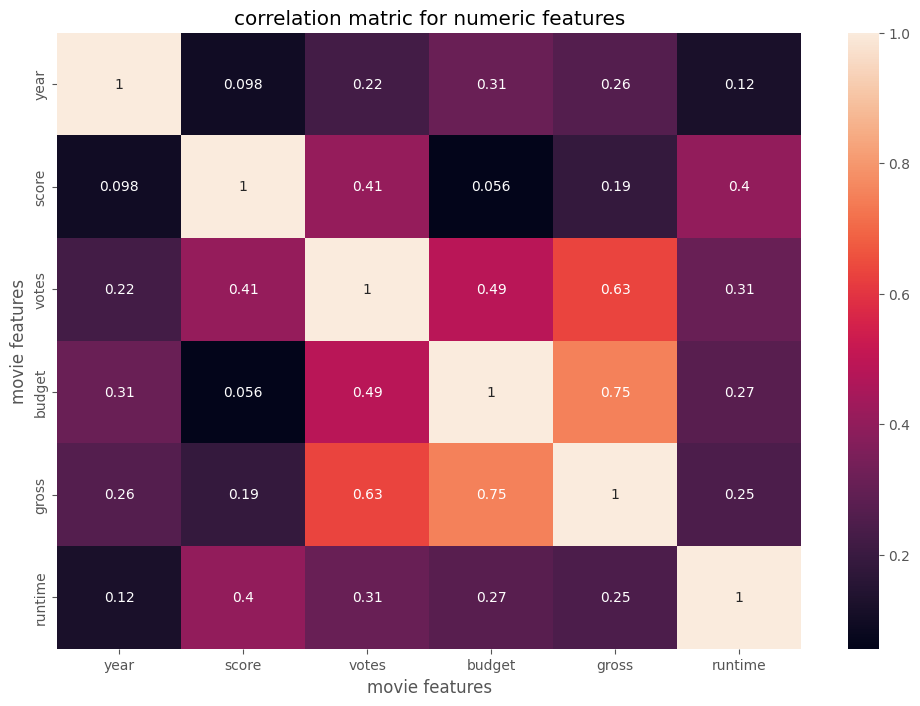

In [145]:
sns.heatmap(df_numeric.corr(method="pearson"),annot=True)
plt.title("correlation matric for numeric features")
plt.xlabel("movie features")
plt.ylabel("movie features")

plt.show()

In [146]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [147]:
df.isnull().sum()

name         0
rating      75
genre        0
year         0
released    56
score        0
votes        0
director     0
writer       0
star         1
country      1
budget       0
gross        0
company     13
runtime      2
dtype: int64

In [148]:
df_numerized=df
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype =="object" :
        df_numerized[col_name]=df_numerized[col_name].astype("category")
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,2009-12-18,7.8,1100000,1155,1776,2330,55,237000000,2847246203,2249,162.0
7445,535,5,0,2019,2019-04-26,8.4,903000,162,741,2237,55,356000000,2797501328,1602,181.0
3045,6888,5,6,1997,1997-12-19,7.8,1100000,1155,1776,1592,55,200000000,2201647264,2249,194.0
6663,5140,5,0,2015,2015-12-18,7.8,876000,1125,2547,522,55,245000000,2069521700,1536,138.0
7244,536,5,0,2018,2018-04-27,8.4,897000,162,741,2237,55,321000000,2048359754,1602,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,5728,6,0,1995,1998-12-23,7.4,19000,2941,2277,2808,47,0,0,557,99.0
799,1733,6,4,1985,1986-07-25,5.8,610,2362,3014,2526,55,0,0,2022,88.0
7667,5390,-1,10,2020,2020-08-19,5.7,7,2163,3341,2459,44,0,0,1783,102.0
27,4439,4,0,1980,1980-08-01,5.0,4100,1281,33,1137,54,36000000,0,1302,115.0


In [149]:
df_numerized.corr(method="pearson")

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.007813,0.016316,0.011135,-0.001179,0.017152,0.013203,0.009336,0.010063,0.006385,-0.010209,0.020966,0.007326,0.010357,0.010675
rating,-0.007813,1.000000,0.072151,0.010661,-0.002708,-0.001146,0.033654,0.018792,-0.005859,0.011598,0.083830,-0.082550,-0.096625,-0.034266,0.062630
genre,0.016316,0.072151,1.000000,-0.081389,-0.078771,0.028097,-0.145321,-0.015178,0.006709,-0.005841,-0.037396,-0.334029,-0.234173,-0.070805,-0.052955
year,0.011135,0.010661,-0.081389,1.000000,0.449199,0.098085,0.223134,-0.021023,-0.007432,-0.026703,-0.070075,0.310337,0.262397,-0.008563,0.120666
released,-0.001179,-0.002708,-0.078771,0.449199,1.000000,0.033828,0.121199,0.001979,0.005214,0.008768,0.008502,0.161913,0.131959,0.036628,0.063032
score,0.017152,-0.001146,0.028097,0.098085,0.033828,1.000000,0.409301,0.009474,0.019585,-0.001652,-0.134194,0.055629,0.186355,0.000818,0.399458
votes,0.013203,0.033654,-0.145321,0.223134,0.121199,0.409301,1.000000,0.000333,0.000570,-0.019138,0.073683,0.486839,0.632962,0.133087,0.309209
director,0.009336,0.018792,-0.015178,-0.021023,0.001979,0.009474,0.000333,1.000000,0.299426,0.039188,0.018078,0.004953,-0.015205,0.004225,0.017409
writer,0.010063,-0.005859,0.006709,-0.007432,0.005214,0.019585,0.000570,0.299426,1.000000,0.027130,0.014755,-0.026772,-0.023271,0.003725,-0.003649
star,0.006385,0.011598,-0.005841,-0.026703,0.008768,-0.001652,-0.019138,0.039188,0.027130,1.000000,-0.013239,-0.019921,-0.000986,0.012314,0.010177


In [150]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,2009-12-18,7.8,1100000,1155,1776,2330,55,237000000,2847246203,2249,162.0
7445,535,5,0,2019,2019-04-26,8.4,903000,162,741,2237,55,356000000,2797501328,1602,181.0
3045,6888,5,6,1997,1997-12-19,7.8,1100000,1155,1776,1592,55,200000000,2201647264,2249,194.0
6663,5140,5,0,2015,2015-12-18,7.8,876000,1125,2547,522,55,245000000,2069521700,1536,138.0
7244,536,5,0,2018,2018-04-27,8.4,897000,162,741,2237,55,321000000,2048359754,1602,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,5728,6,0,1995,1998-12-23,7.4,19000,2941,2277,2808,47,0,0,557,99.0
799,1733,6,4,1985,1986-07-25,5.8,610,2362,3014,2526,55,0,0,2022,88.0
7667,5390,-1,10,2020,2020-08-19,5.7,7,2163,3341,2459,44,0,0,1783,102.0
27,4439,4,0,1980,1980-08-01,5.0,4100,1281,33,1137,54,36000000,0,1302,115.0


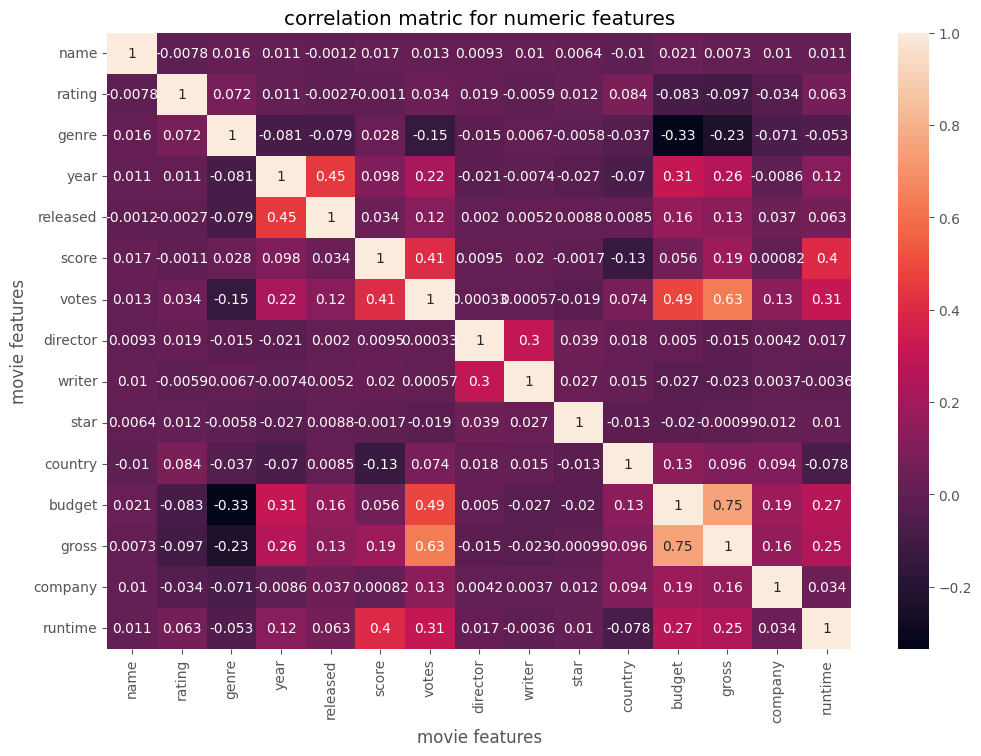

In [152]:
sns.heatmap(df_numerized.corr(method='pearson'),annot=True)
plt.title("correlation matric for numeric features")
plt.xlabel("movie features")
plt.ylabel("movie features")

plt.show()

In [157]:
correlation_matrix=df_numerized.corr()
corr_pairs=correlation_matrix.unstack()
corr_pairs

name      name        1.000000
          rating     -0.007813
          genre       0.016316
          year        0.011135
          released   -0.001179
          score       0.017152
          votes       0.013203
          director    0.009336
          writer      0.010063
          star        0.006385
          country    -0.010209
          budget      0.020966
          gross       0.007326
          company     0.010357
          runtime     0.010675
rating    name       -0.007813
          rating      1.000000
          genre       0.072151
          year        0.010661
          released   -0.002708
          score      -0.001146
          votes       0.033654
          director    0.018792
          writer     -0.005859
          star        0.011598
          country     0.083830
          budget     -0.082550
          gross      -0.096625
          company    -0.034266
          runtime     0.062630
genre     name        0.016316
          rating      0.072151
        

In [156]:
pd.set_option("display.max_rows",None)

In [159]:
sorted_pairs= corr_pairs.sort_values(ascending=False)

In [ ]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

name      name        1.000000
rating    rating      1.000000
genre     genre       1.000000
released  released    1.000000
year      year        1.000000
score     score       1.000000
votes     votes       1.000000
writer    writer      1.000000
director  director    1.000000
budget    budget      1.000000
gross     gross       1.000000
runtime   runtime     1.000000
company   company     1.000000
star      star        1.000000
country   country     1.000000
budget    gross       0.750257
gross     budget      0.750257
          votes       0.632962
votes     gross       0.632962
dtype: float64